### Table of contents:

* [install required packages](#install)

* [toggle code on off](#toggle)

* [create a dataframe of k8 issues](#issues_df)

* [select columns to display per issue](#issues_viz)

* [issues per repo](#issues_p_repo)

* [issues per user](#issues_p_user)

* [issues per assignee](#issues_p_assignee)

* [word cloud of repos](#wc-repos)

* [word cloud of users](#wc-users)

* [word cloud of assignees](#wc-assignees)

* [Save issues to csv file](#save)

## install required packages <a class="anchor" id="install"></a>

In [12]:
import sys
sys.path.insert(0, '../models/')
import pandas as pd
from transform import transform_issues
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interactive
import numpy as np
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

## hide or unhide code <a class="anchor" id="toggle"></a>

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## create a dataframe of k8 issues <a class="anchor" id="issues_df"></a>

In [2]:
issues = transform_issues()

## select what to display per issue  <a class="anchor" id="issues_viz"></a>

In [3]:
# create a copy of issues
df=issues.copy()
# select columns to display
df = df[['repo','title', 'user_', 'state', 'url', 'created_at','assignee']]

## view the first two issues

In [4]:
display(df.head(2))

,repo,title,user_,state,url,created_at,assignee
0,aws-jmeter-test-engine,Implement delete stack feature in main master script,uzfarid,open,https://api.github.com/repos/k8-proxy/aws-jmeter-test-engine/issues/89,2020-10-29T20:41:32Z,Ali-J2
1,aws-jmeter-test-engine,Enable prefix in createStack python script and ensure that StartExecution.sh is based on new template,uzfarid,open,https://api.github.com/repos/k8-proxy/aws-jmeter-test-engine/issues/87,2020-10-29T04:43:16Z,pranaysahith


## widget of issues per repo <a class="anchor" id="issues_p_repo"></a>

In [5]:
items = ['All']+sorted(df['repo'].unique().tolist())
def view(Repo=''):
    if Repo=="All": display(df)
    display(df[df.repo==Repo].reset_index(drop=True))
w = widgets.Select(options=items)
interactive(view, Repo=w)

interactive(children=(Select(description='Repo', options=('All', 'GW-proxy', 'ICAP-threat-model', 'aws-jmeter-…

 ## widget of issues per user <a class="anchor" id="issues_p_user"></a>

In [6]:
items = ['All']+sorted(df['user_'].unique().tolist())
def view(User=''):
    if User=="All": display(df)
    display(df[df.user_==User].reset_index(drop=True))
w = widgets.Select(options=items)
interactive(view, User=w)

interactive(children=(Select(description='User', options=('All', 'AndresJim', 'GINAGC', 'Infospectives', 'Isla…

## widget issues per assignee <a class="anchor" id="issues_p_assignee"></a>

In [7]:
items = ['All']+df.assignee.explode().unique().tolist()
items = [x for x in items if x is not None]
def view(Assignee=''):
    if Assignee=="All": display(df)
    display(df[df.assignee==Assignee].reset_index(drop=True))
w = widgets.Select(options=items)
interactive(view, Assignee=w)

interactive(children=(Select(description='Assignee', options=('All', 'Ali-J2', 'pranaysahith', 'MaNe2020', 'uz…

## word cloud of users <a class="anchor" id="wc-users"></a>

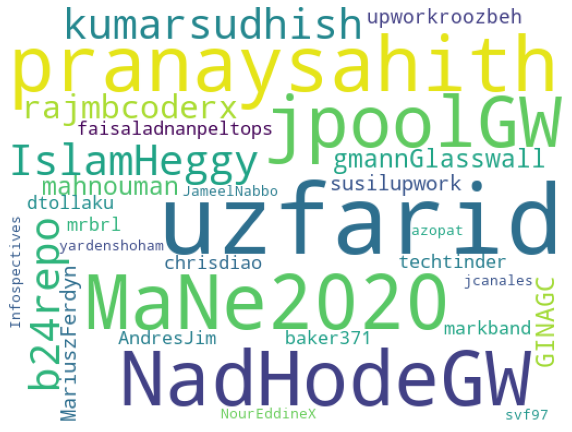

In [8]:
x2011 = df.user_.unique()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

## word cloud of repos <a class="anchor" id="wc-repos"></a>

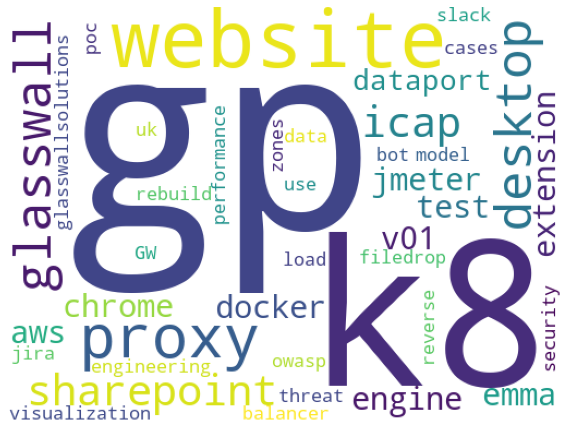

In [9]:
x2011 = df.repo.unique()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

## word cloud of assignees <a class="anchor" id="wc-assignees"></a>

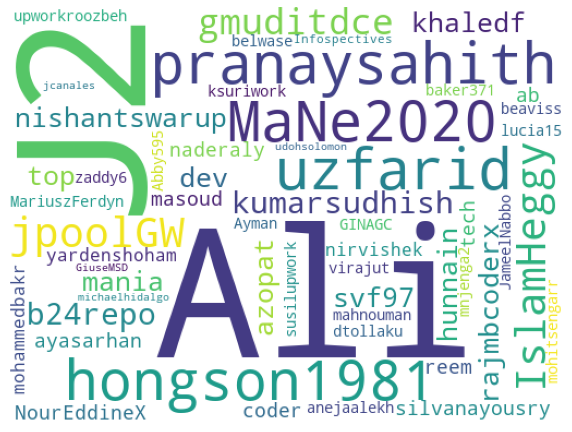

In [10]:
x2011 = df.assignee.explode().unique().tolist()
x2011 = [x for x in x2011 if x is not None]
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

## save issues to csv file <a class="anchor" id="save"></a>

In [13]:
df.to_csv("../data/issues.csv", index=False)